<a href="https://colab.research.google.com/github/kelvinfoo123/Survival-Analysis/blob/main/Haberman_Survival_Analysis_(Cox_PH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [4]:
data = pd.read_csv("haberman.csv", names = ['Age', 'Operation_yr', 'Num_positive_auxillary_nodes', 'Surv'])
data.head()

,Age,Operation_yr,Num_positive_auxillary_nodes,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
!pip install lifelines 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.4 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=6ab8010c85e3577dbc1fe769b19bae9a915d91430f04cdec5828101c5232e534
  Stored in directory: /root/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd-gamma


In [7]:
from lifelines import CoxPHFitter

## **Cox-PH Model**

In [8]:
ph = CoxPHFitter()

# Time = Age, Event = Surv 
# Remaining column acts as covariates to the PH model 
ph.fit(data, 'Age', event_col = 'Surv')

ph.print_summary()

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'Age'
                event col = 'Surv'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2022-12-20 05:19:04 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
Operation_yr                  -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
Num_positive_auxillary_nodes   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

                               cmp to     z    p   -log2(p)
covariate                                                  
Operation_yr                     0.00 -1.39 0.16       2.61
Num_positive_auxillary_nodes     0.00  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25



*   The coefficient for operation_yr is negative. An increase in years from operation decreases the hazard risk.
*   An increase in number of positive auxillary nodes increases the hazard risk. 

However, both factors play only a tiny significant role in predicting the survival of an individual. 



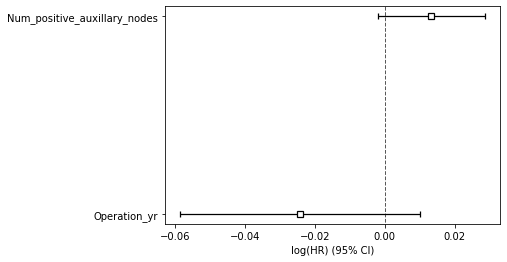

In [9]:
ph.plot()

Note the large confidence interval. This indicates that more data are needed. 

## **Cox-PH Survival Curve**

In [10]:
# Examine survival curve of patient 4, 125 and 211

patients = [4, 125, 211]

rows_selected = data.iloc[patients, 1:3]
rows_selected 

,Operation_yr,Num_positive_auxillary_nodes
4,65,4
125,64,0
211,67,0


<Figure size 720x576 with 0 Axes>

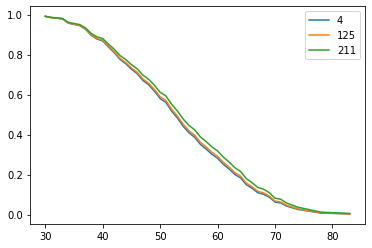

In [12]:
plt.figure(figsize = (10,8))
ph.predict_survival_function(rows_selected).plot()